# vehicle

In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2


In [3]:
from matplotlib import pyplot as plt


In [4]:
import numpy as np

In [5]:

import imutils

# easy ocr

In [6]:
pip install easyocr


# 123

In [7]:


pip install -U numpy --user

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ---------------------------------------- 61.1/61.1 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB 2.0 MB/s eta 0:00:08
   ---------------------------------------- 0.1/15.8 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.1/15.8 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.2/15.8 MB 1.3 MB/s eta 0:00:13
    --------------------------------------- 0.2/15.8 MB 1.0 MB/s eta 0:00:16
    --------------------------------------- 0.3/15.8 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.4/15.8 MB 1.1 MB/s eta 0:00:14
    ------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python311\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Check the permissions.



In [8]:

pip install -U easyocr --user

Note: you may need to restart the kernel to use updated packages.


In [9]:
import easyocr

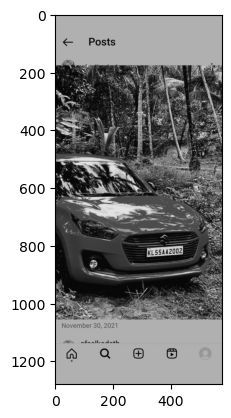

In [23]:
img = cv2.imread('image6.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

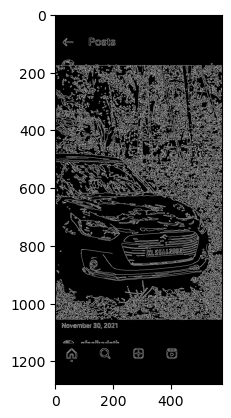

In [24]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [25]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [26]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [27]:
location

array([[[441, 802]],

       [[320, 809]],

       [[316, 838]],

       [[440, 831]]], dtype=int32)

In [28]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

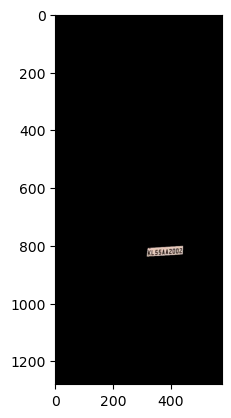

In [29]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [30]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

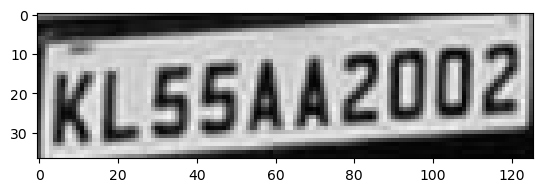

In [31]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [32]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 1], [126, 1], [126, 37], [0, 37]], 'KL55442002', 0.6558590092595981)]

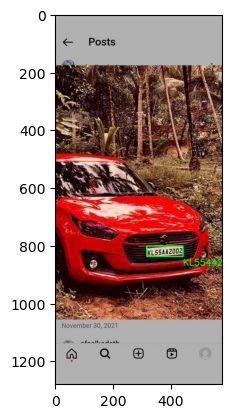

In [33]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [34]:
print("Vehicle No: ", text)

Vehicle No:  KL55442002


In [35]:
v1 = text.replace(".", "")
print(v1)

KL55442002


In [36]:
v2 = v1.replace(" ", "")
print(v2)

KL55442002


In [39]:
def replace_by_index(s, index, replacement):
    # Convert string to list
    lst = list(s)
    
    # Replace the character at the specified index
    lst[index] = replacement
    
    # Join the list back to a string
    return ''.join(lst)


In [40]:
if len(v2)==10:
    
    if v2[4]=="4":
        v2 = replace_by_index(v2, 4, 'A')

    if v2[5]=="4":
    
        v2 = replace_by_index(v2, 5, 'A')
    if v2[5]=="5":
        v2 = replace_by_index(v2, 5, 'S')
    if v2[4]=="5":
        v2 = replace_by_index(v2, 4, 'S')
    if v2[0]=="4":
        v2 = replace_by_index(v2, 0, 'A')
    if v2[1]=="4":
        v2 = replace_by_index(v2, 1, 'A')


if len(v2)==9:
    
    if v2[3]=="4":
        v2 = replace_by_index(v2, 4, 'A')
    if v2[3]=="5":
        v2 = replace_by_index(v2, 5, 'S')
    if v2[0]=="4":
        v2 = replace_by_index(v2, 0, 'A')
    if v2[1]=="4":
        v2 = replace_by_index(v2, 1, 'A')
        
print(v2)



KL55AA2002
